## Notebook Imports

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Constants


In [2]:
VOCAB_SIZE = 2500

TOKEN_SPAM_PROB_FILE = r'C:/Users/THE WIZRD/Desktop/SpamData/03_Testing/prob-spam.txt'
TOKEN_HAM_PROB_FILE= r'C:/Users/THE WIZRD/Desktop/SpamData/03_Testing/prob-nonspam.txt'
TOKEN_ALL_PROB_FILE = r'C:/Users/THE WIZRD/Desktop/SpamData/03_Testing/prob-all-tokens.txt'

TEST_FEATURE_MATRIX = r'C:/Users/THE WIZRD/Desktop/SpamData/03_Testing/test-features.txt'
TEST_TARGET_FILE = r'C:/Users/THE WIZRD/Desktop/SpamData/03_Testing/test-target.txt'



## Load the Data

In [3]:
# Features
X_test = np.loadtxt(TEST_FEATURE_MATRIX, delimiter=' ')
# Target
y_test = np.loadtxt(TEST_TARGET_FILE, delimiter=' ')
# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE, delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE, delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE, delimiter=' ')


# Calculating the Joint Probability

In [4]:
prob_token_spam.shape

(2500,)

In [5]:
X_test.shape

(1723, 2500)

In [6]:
print('shape of the dot product is', X_test.dot(prob_token_spam).shape)

shape of the dot product is (1723,)


## Set the Prior

### $$P(Spam \, | \, X) = \frac{P(X \, | \, Spam \,) \, P(Spam)} {P(X)}$$

In [7]:
PROB_SPAM = 0.3116

In [8]:
np.log(prob_token_spam)

array([ -4.70632085,  -5.32161816,  -4.98677062, ...,  -9.20111798,
        -8.70034269, -10.40509078])

## Joint probability in log format

In [9]:
joint_log_spam = X_test.dot(np.log(prob_token_spam) - np.log(prob_all_tokens)) + np.log(PROB_SPAM)

In [10]:
joint_log_spam[:5]

array([  3.21643926,  13.38035269,  19.20668974, -16.61242345,
        27.93765399])

### $$P(Ham \, | \, X) = \frac{P(X \, | \, Ham \,) \, (1-P(Spam))} {P(X)}$$

In [11]:
joint_log_ham = X_test.dot(np.log(prob_token_ham) - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)

In [12]:
joint_log_ham.size


1723

In [13]:
joint_log_ham[:5]

array([-11.05063426, -36.94310619, -38.25679825,  -2.70364873,
       -60.15266519])

# Making Predictions

### checking for the higher joint probability

$$P(Spam \, | \, X)\, > \, P(Ham \, | \, X)?$$

In [14]:
y_hat = joint_log_spam > joint_log_ham

In [15]:
prediction = y_hat.astype(int)
prediction

array([1, 1, 1, ..., 0, 0, 0])

### Simplify

In [16]:
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)
joint_log_ham = X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)

## Model Evaluation

### Accuracy

In [17]:
correct_docs = (y_test == prediction).sum()
print( 'Docs classified correctly', correct_docs)

numdocs_wrong = X_test.shape[0] - correct_docs
print('Docs classified incorrectly', numdocs_wrong)

Docs classified correctly 1671
Docs classified incorrectly 52


In [18]:
# Accuracy
print('Model Accuracy is {:.2%}'.format(correct_docs/len(X_test)))


Model Accuracy is 96.98%


## Visualising the Results

In [52]:
 # Chart Styling info
yaxis_label = 'P(X | Spam)'
xaxis_label = 'P(X | NonSpam)'

linedata = np.linspace(-1400, 1, 1000)

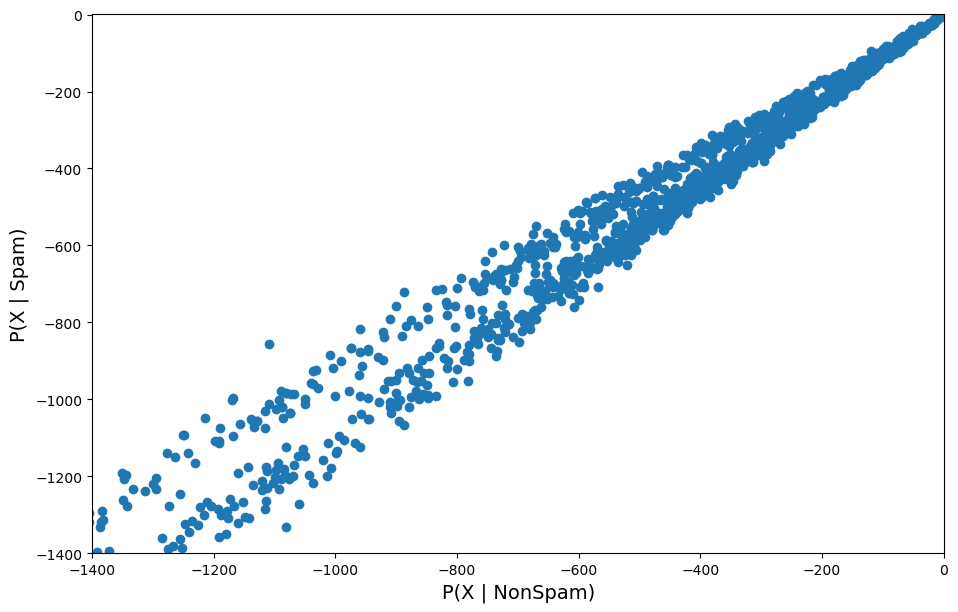

In [24]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-1400,1])
plt.ylim([-1400,1])
plt.scatter(joint_log_ham, joint_log_spam)
plt.show()

## The Decision Boundry

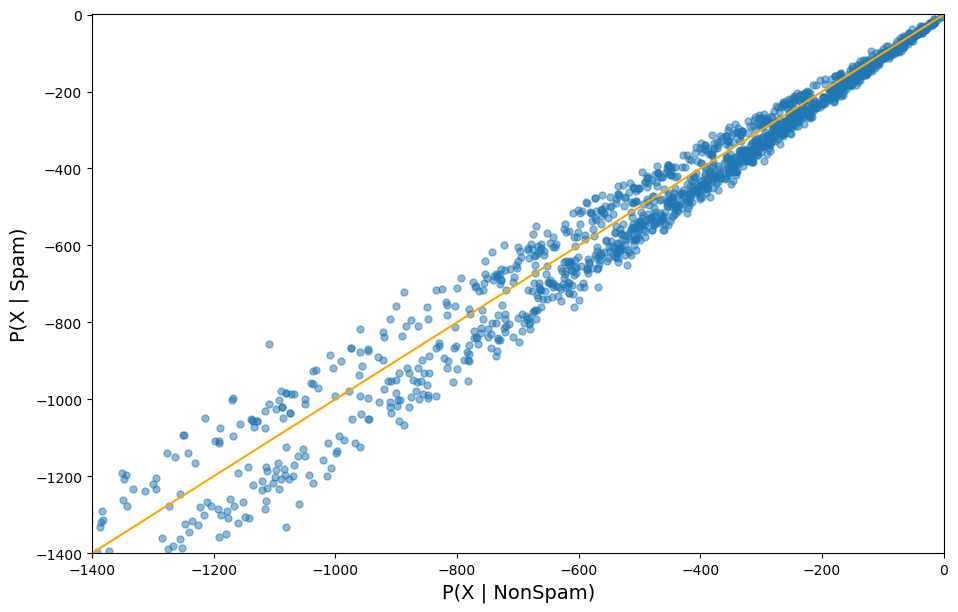

In [30]:
plt.figure(figsize=(11,7))
plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-1400,1])
plt.ylim([-1400,1])
plt.scatter(joint_log_ham, joint_log_spam, alpha=0.5, s= 25)

plt.plot(linedata, linedata, color='orange')

plt.show()

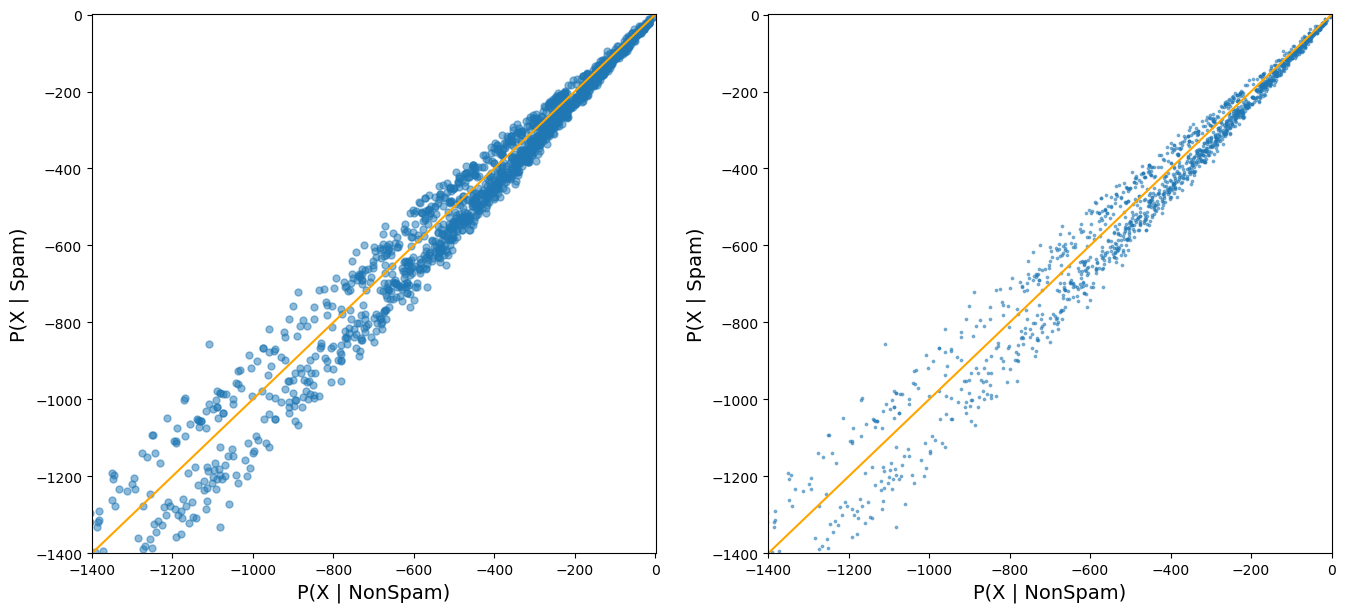

In [32]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)

# Chart no 1

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-1400,1])
plt.ylim([-1400,1])
plt.scatter(joint_log_ham, joint_log_spam, alpha=0.5, s= 25)

plt.plot(linedata, linedata, color='orange')

# Second Chart
plt.subplot(1,2,2)

plt.xlabel(xaxis_label, fontsize=14)
plt.ylabel(yaxis_label, fontsize=14)

plt.xlim([-1400,1])
plt.ylim([-1400,1])

plt.scatter(joint_log_ham, joint_log_spam, alpha=0.5, s= 3)

plt.plot(linedata, linedata, color='orange')

plt.show()

In [34]:
# Chart Styling

sns.set_style('whitegrid')
labels = 'Actual Category'

summary_df = pd.DataFrame({yaxis_label: joint_log_spam, xaxis_label: joint_log_ham,
                          labels: y_test})




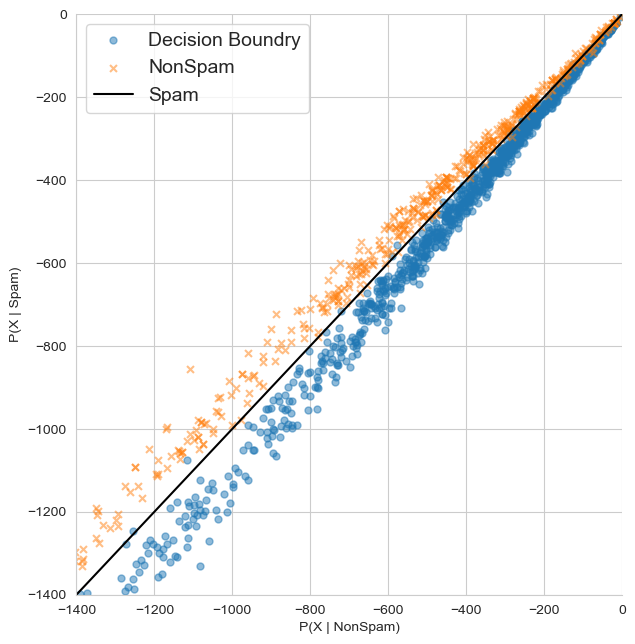

In [51]:
sns.lmplot(x=xaxis_label, y=yaxis_label, data=summary_df, height = 6.5, fit_reg= False,
          scatter_kws={'alpha': 0.5, 's':25}, hue= labels, markers=['o', 'x'], legend=False
          )

plt.xlim(-1400, 1)
plt.ylim(-1400, 1)

plt.plot(linedata, linedata, color='Black')


plt.legend(('Decision Boundry', 'NonSpam', 'Spam'), fontsize=14)
plt.show()

### False Positives and False Negatives

In [53]:
np.unique(prediction, return_counts=True)

(array([0, 1]), array([1163,  560], dtype=int64))

In [56]:
true_pos = (y_test == 1) & (prediction == 1)

In [80]:
true_pos = true_pos.sum()

In [79]:
false_pos = (y_test==0) & (prediction == 1)

false_pos = false_pos.sum()

In [78]:
false_neg = (y_test ==1 ) & (prediction == 0)
false_neg = false_neg.sum()

In [75]:
true_neg = sum((y_test == 0) & (prediction == 0))
true_neg


1123

### Confusion Matrix


In [90]:
confusion_matrix = np.array([[ true_pos, true_neg],
                    [false_pos, false_neg]])

confusion_matrix.shape
confusion_matrix

array([[ 548, 1123],
       [  12,   40]])

C:\Users\THE WIZRD\AppData\Local\Temp\ipykernel_12976\3470874682.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
C:\Users\THE WIZRD\AppData\Local\Temp\ipykernel_12976\3470874682.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['Actual Positive', 'Actual Negative'])


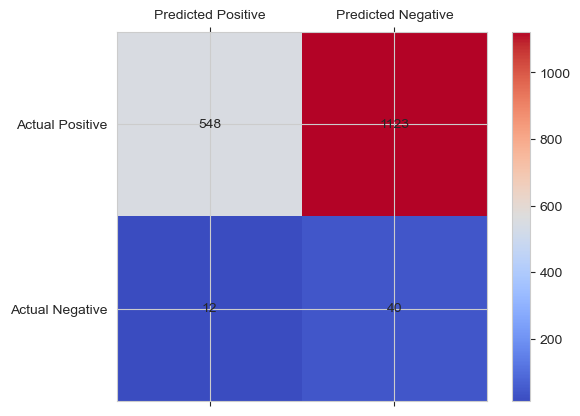

In [93]:

fig, ax = plt.subplots()

# Plot the heatmap
cax = ax.matshow(confusion_matrix, cmap="coolwarm")

# Show colorbar
plt.colorbar(cax)

# Add labels
labels = ['Predicted Positive', 'Predicted Negative']
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + ['Actual Positive', 'Actual Negative'])

# Add text annotations
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center')

plt.show()

### Recall Score 

$$ Recall\, Score = \frac{True\, Positives}{True\, Positives\, + \,False Negatives}$$

In [65]:
recall = true_pos.sum() / (false_neg.sum() + true_pos.sum())
'{:.2%}'.format(recall)

'93.20%'

### Precision Metric

$$ Precision = \frac{True\, Positives}{True\, Positives\, +\, False\, Positives}$$

In [68]:
precision = true_pos.sum()/(true_pos.sum() + false_pos.sum())
'{:.2%}'.format(precision)

'97.86%'

### F1 Score

$$ F1\,Score\,=\,2*\frac{Precision\,*\,Recall}{Precision\,+\,Recall}$$

In [95]:
f1 = 2*(precision*recall/(precision+recall))
'{:.2%}'.format(f1)

'95.47%'